In [1]:
#Import necessary libraries and packages
import warnings 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pandas_profiling as pp

#Preferred settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

In [2]:
#Import Footprint and Biocapacity data
data = pd.read_csv('../Data/footprint-nfba-2019/data/nfa_2019_public_data.csv')
df = data

#Observe data shape and head
print(df.shape)
df.head()

(72186, 12)


,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,qscore
0,Armenia,1992,1,AreaPerCap,0.140292,0.199546,0.097188051,0.036888,0.029320,0.000000,5.032351e-01,3A
1,Armenia,1992,1,AreaTotHA,483000.000000,687000.000000,334600,127000.000000,100943.000800,0.000000,1.732543e+06,3A
2,Armenia,1992,1,BiocapPerCap,0.159804,0.135261,0.084003213,0.013742,0.033398,0.000000,4.262086e-01,3A
3,Armenia,1992,1,BiocapTotGHA,550176.242700,465677.972200,289207.1078,47311.551720,114982.279300,0.000000,1.467355e+06,3A
4,Armenia,1992,1,EFConsPerCap,0.387510,0.189462,1.26E-06,0.004165,0.033398,1.114093,1.728629e+00,3A


## Data Cleaning

In [3]:
#check random data chunk
data.sample(5)

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,qscore
37171,Libyan Arab Jamahiriya,1995,124,BiocapTotGHA,8.953045e+05,1.425840e+06,125178.8908,1.594707e+06,7.731186e+04,0.000000e+00,4.118342e+06,3A
16359,Denmark,2013,54,EFProdTotGHA,1.078046e+07,4.363645e+04,2023621.573,2.254782e+06,1.133245e+06,1.386794e+07,3.010369e+07,3A
64519,Uganda,2009,226,EFConsTotGHA,1.080724e+07,5.498999e+06,18092432.43,4.870523e+06,1.117988e+06,2.754584e+06,4.314176e+07,3A
30735,Italy,1986,106,EFProdTotGHA,3.388228e+07,2.703809e+06,5226374.375,3.045057e+06,3.013098e+06,1.244387e+08,1.723093e+08,3A
53640,Saint Lucia,1963,189,EFProdPerCap,3.084328e-01,1.533194e-02,0.028340804,8.802917e-03,2.447271e-03,8.006503e-02,4.434208e-01,3A


We check the data-type of each column is of preferred data type

In [4]:
data.dtypes

country            object
year                int64
country_code        int64
record             object
crop_land         float64
grazing_land      float64
forest_land        object
fishing_ground    float64
built_up_land     float64
carbon            float64
total             float64
qscore             object
dtype: object

The Data type of the "country", "record", and "QScore" columns are of object type, which should be converted to String to be accessed or modified

In [5]:
#modify the datatype of country, record and QScore columns
data["country"] = data['country'].astype('string')
data["record"] = data['record'].astype('string')
data["qscore"] = data['qscore'].astype('string')

data.dtypes

country            string
year                int64
country_code        int64
record             string
crop_land         float64
grazing_land      float64
forest_land        object
fishing_ground    float64
built_up_land     float64
carbon            float64
total             float64
qscore             string
dtype: object

In order to carry out accurate pre-processing we have to first find out the number of Null Values in each column.

In [6]:
#check null values
print(data.isna().sum())
print(data.shape)

country               0
year                  0
country_code          0
record                0
crop_land         20472
grazing_land      20472
forest_land       20472
fishing_ground    20473
built_up_land     20473
carbon            20473
total                 9
qscore                1
dtype: int64
(72186, 12)


Since Entire rows contain NULL values, we have removed all such rows to clean our data. Rows were removed by removing rows that had less than 7 non-NULL cells.

In [7]:
#drop null values
df = data.dropna(axis=0, thresh=7)
#compression_opts = dict(method='zip', archive_name='out.csv')  
#df.to_csv('out.zip', index=False, compression=compression_opts) 

print(df.shape)
print(df.isna().sum())

(51714, 12)
country           0
year              0
country_code      0
record            0
crop_land         0
grazing_land      0
forest_land       0
fishing_ground    1
built_up_land     1
carbon            1
total             1
qscore            1
dtype: int64


The "qscore" is indicative of the reliability of Data. 
By dropping duplicate countries, we can realised for how reliable our overall data is for each country.

## Exploratory Data Analysis

(193, 12)


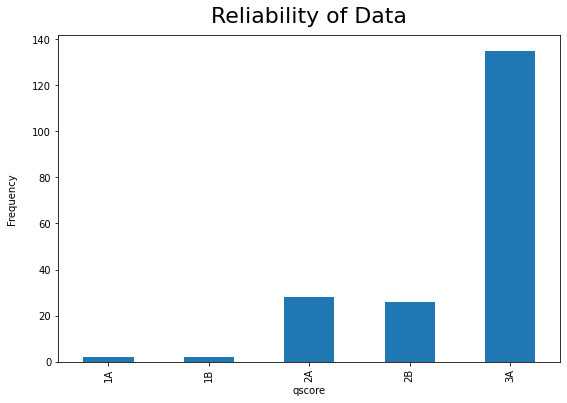

In [8]:
#drop duplicates
countryUniquedata = data.drop_duplicates(subset = "country")
countryUniqueCleaned = df.drop_duplicates(subset = "country")

print(countryUniquedata.shape)
#print(countryUnique.tail(20))

%matplotlib inline
#observe qscore
countryUniquedata.groupby('qscore').size().plot(kind = 'bar', figsize=(9, 6))
plt.ylabel("Frequency", labelpad=15)
plt.title("Reliability of Data", y=1.02, fontsize=22)
plt.show()
#countryUniqueCleaned.groupby('QScore').size().plot(kind = 'bar')

By Filtering our data only Ecological Footprint Consumption, we can observe how World Carbon Footprint level have changed from 1969-2016



Text(0.5, 1.02, 'World Carbon Footprint')

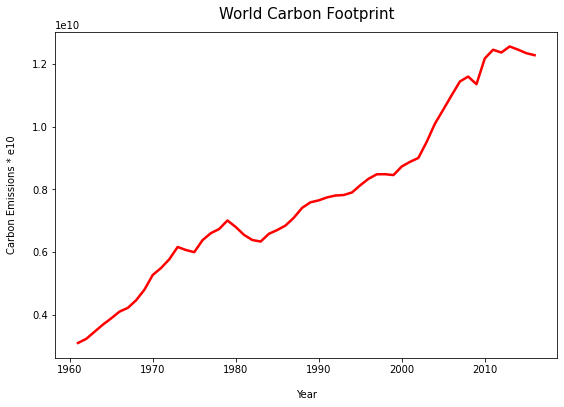

In [9]:
#data.loc[data.record == "EFConsTotGHA" & data.country == "World"]
#import matplotlib.pyplot as plt

worldData = data.loc[(data['record'] == "EFConsTotGHA") & (data['country'] == "World")]

worldData.sample(5)

#observe world carbon footprint
worldData.set_index('year')['carbon'].plot(figsize=(9, 6), linewidth=2.5, color='red')
plt.xlabel("Year", labelpad=15)
plt.ylabel("Carbon Emissions * e10", labelpad=15)
plt.title("World Carbon Footprint", y=1.02, fontsize=15)

The Ecological Footprint gives an idea on measure human demand on natural capital, that is the quantity of nature it takes to support people or an economy,  while the biocapacity is indicative of regenrative capacity of resources to meet demand in the ecosystem. 

Plotting both gives us the idea about the sustainability of our current usage.

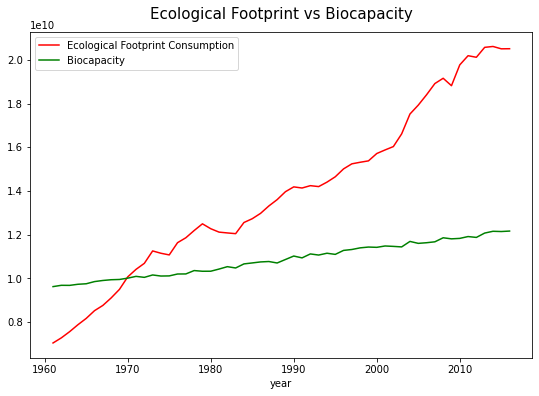

In [10]:
#data for analyzing ecological footprint and biocapacity 
worldEF = data.loc[(data['record'] == "EFConsTotGHA") & (data['country'] == "World")]
worldBC = data.loc[(data['record'] == "BiocapTotGHA") & (data['country'] == 'World')]

#worldEF.sample(5)
#worldBC.sample(5)

#observe Ecological Footprint vs Biocapacity
ax = plt.gca()
worldEF.plot(kind='line', x='year', y='total', color='red', figsize=(9,6), ax=ax)
worldBC.plot(kind='line', x='year', y='total', color='green', figsize=(9,6), ax=ax)
l=plt.legend()
l.get_texts()[0].set_text('Ecological Footprint Consumption')
l.get_texts()[1].set_text('Biocapacity')
plt.title("Ecological Footprint vs Biocapacity", y=1.02, fontsize=15)
plt.show()


Per Capita value of both measures gives an idea of resources consumed or are available per person. 
The large decrease in Biocapacity values are due to a lower increase in actual Biocapacity values from 1969.

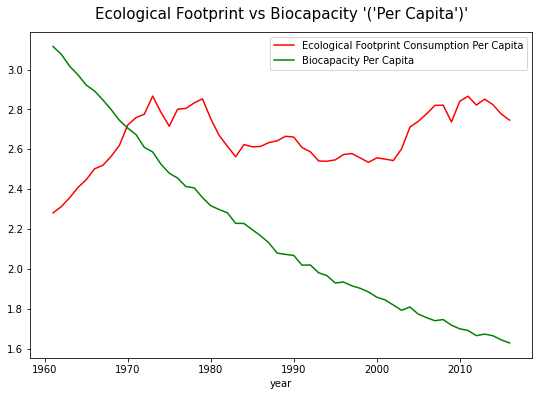

In [16]:
#data for analyzing ecological footprint and biocapacity 
worldEFCap = data.loc[(data['record'] == "EFConsPerCap") & (data['country'] == "World")]
worldBCCap = data.loc[(data['record'] == "BiocapPerCap") & (data['country'] == "World")]

#worldEFCap.sample(5)
#worldBCCap.sample(5)

#observe Ecological Footprint vs Biocapacity Per Capita
ax = plt.gca()
worldEFCap.plot(kind='line', x='year', y='total', color='red', figsize=(9,6), ax=ax)
worldBCCap.plot(kind='line', x='year', y='total', color='green', figsize=(9,6), ax=ax)
l=plt.legend()
l.get_texts()[0].set_text('Ecological Footprint Consumption Per Capita')
l.get_texts()[1].set_text('Biocapacity Per Capita')
plt.title("Ecological Footprint vs Biocapacity '('Per Capita')'", y=1.02, fontsize=15)
plt.show()


Countries with higher Ecological Footprint often cause a skew in data. Below, we've found contries with highest Ecological Footprint in 1970 and 2016

In [32]:
#data for analyzing highest ecological footprint in 1970 & 2016 
EFData1970 = df.loc[(df['record'] == "EFConsTotGHA") & (df['country'] != "World") & (df['year'] == 1970)]
EFData2016 = df.loc[(df['record'] == "EFConsTotGHA") & (df['country'] != "World") & (df['year'] == 2016)]

#grouped=EFData1970['total'].max()
#grouped.sort_index(ascending=True)

#EFData1970.sample(5)
#EFData2016.sample(5)

#observe countries with highest ecological footprint in 1970 and 2016 respectively
highEF1970 = EFData1970.sort_values(by = 'carbon', ascending = False)
highEF2016 = EFData2016.sort_values(by = 'carbon', ascending = False)

print(highEF1970[['country','year','carbon','total','qscore']].head())
print('  --------------------------------------------------------------------')
print(highEF2016[['country','year','carbon','total','qscore']].head())


                        country  year        carbon         total qscore
65551  United States of America  1970  1.572516e+09  2.172632e+09     3A
23101                   Germany  1970  3.820388e+08  5.355856e+08     3A
32149                     Japan  1970  3.171436e+08  5.292070e+08     3A
71367                     China  1970  2.898878e+08  8.902225e+08     3A
64903            United Kingdom  1970  2.577190e+08  3.929237e+08     3A
  --------------------------------------------------------------------
                        country  year        carbon         total qscore
71735                     China  2016  3.578043e+09  5.195886e+09     3A
65919  United States of America  2016  1.819740e+09  2.611074e+09     3A
28501                     India  2016  8.314653e+08  1.547649e+09     3A
53503        Russian Federation  2016  4.701226e+08  7.428478e+08     3A
32517                     Japan  2016  4.329122e+08  5.739390e+08     3A


We use scatterplot to observe how Ecological Footprint values have changed over time. This gives us an idea about how the production values have increase with time

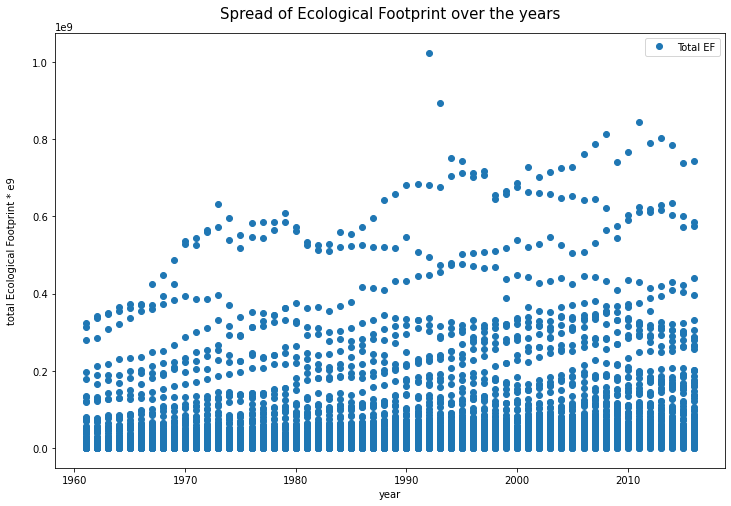

In [39]:
#data for ecological footprint spread over the years
#year = df.loc[(df['record'] == "EFConsTotGHA") & (df['country'] != "World") & (df['country'] != "China") & (df['country'] != " United States of America")]

country = ['China',  "United States of America", "India", "World"]
yearData = df.loc[(df['record'] == "EFConsTotGHA") & (~df['country'].isin(country))]
#print(yearData)
print()

#observe the spread of Ecological Footprint over the years
yearData.plot(x='year', y='total', style='o', figsize=(12,8))
plt.ylabel("total Ecological Footprint * e9", labelpad=15)
plt.title("Spread of Ecological Footprint over the years", y=1.02, fontsize=15)
L=plt.legend()
L.get_texts()[0].set_text('Total EF')